# New York City Rental Prediction

## Data Source

The dataset 'rentalnew' has been preprocessed in Analysis & Visualization part, longitude and latitude are generated and added into dataset so as to predict 'rent' based on independent variables.

## Dataset

1. rental_id: the id of apartment unit
2. building_id: the id of apartment building
3. rent: the rent of apartment
4. bedrooms: bedroom amount
5. bathrooms: bathrooms amount
6. size_sqft: apartment size
7. min_to_subway: apartment to nearest subway stop walking time
8. floor: the floor of apartment
9. building_age_years: apartment building history
10. no_fees: free amenity fee or not
11. has_roofdeck: has roof-deck or not
12. has_wahser_dryer: has washer + dryer or not
13. has_doorman: has doorman or not
14. has_elevator: has elevator or not
15. has_dishwasher: has dishwasher or not
16. has_patio: has patio or not
17. has_gym: has gym or not
18. neighborhood: third-level region
19. submarket: second-level region
20. borough: first-level region
21. longitude: submarket longitude
22. latitude: submarket latitude

For dummy variables (10-17): 1 == YES, 0 == NO.

## Inspiration

1. Data Preprocessing

   1.1 Missing Value                               
   1.2 Categorical Encoding      
   1.3 Feature Processing  
   
   
   
      1.3.1 Transformation  
      1.3.2 Distribution  
      1.3.3 Outlier  
      1.3.4 Correlation  
      1.3.5 Normalization  
      1.3.6 Importance

      
2. Prediction

   2.1 Cross Validation   
   2.2 Polynomial Transformation    
   2.3 Hyperparameter Tuning   
   2.4 Modeling
   
 
      2.4.1 Linear Regression
      2.4.2 Lasso Regression
      2.4.3 ElasticNet Regression   
      
3. Prediction after Feature Selection 
4. Conclusion 
5. Future Improvement

In [49]:
# --------------------------- Processing  --------------------------- #
import pandas as pd
import numpy as np
# --------------------------- Visualization ------------------------- #
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
plt.style.use('ggplot')
# ----------------------------- Modeling ---------------------------- #
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# ----------------------------- Metrics ----------------------------- #
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# ----------------- Data Preprocessing ------------------

In [52]:
# load dataset
df=pd.read_csv('/Users/stevenli/Desktop/dataset/rentalnew.csv')

In [53]:
# dataset overview
df.head(5)

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,latitude,longitude
0,7158.0,14686975.0,14500.0,4.0,5.0,2700.0,8.0,30.0,18.0,1.0,...,0.0,1.0,1.0,0.0,1.0,Upper East Side,All Upper East Side,Manhattan,40.773702,-73.964120
1,5433.0,33299325.0,18900.0,4.0,5.0,2617.0,43.0,8.0,8.0,1.0,...,1.0,1.0,0.0,0.0,1.0,Upper West Side,All Upper West Side,Manhattan,40.787046,-73.975416
2,2074.0,75680780.0,15000.0,5.0,4.0,2860.0,6.0,42.0,28.0,0.0,...,1.0,0.0,1.0,1.0,1.0,Upper East Side,All Upper East Side,Manhattan,40.773702,-73.964120
3,8548.0,36330471.0,18250.0,4.0,4.0,2700.0,2.0,4.0,85.0,0.0,...,0.0,1.0,1.0,0.0,1.0,Upper West Side,All Upper West Side,Manhattan,40.787046,-73.975416
4,974.0,90568214.0,18000.0,4.0,4.0,3160.0,1.0,5.0,79.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Upper West Side,All Upper West Side,Manhattan,40.787046,-73.975416


## Missing Values

In [54]:
# missing value check
df.isnull().sum()

rental_id           2
building_id         2
rent                2
bedrooms            2
bathrooms           2
size_sqft           2
min_to_subway       2
floor               2
building_age_yrs    2
no_fee              2
has_roofdeck        2
has_washer_dryer    2
has_doorman         2
has_elevator        2
has_dishwasher      2
has_patio           2
has_gym             2
neighborhood        2
submarket           2
borough             2
latitude            2
longitude           2
dtype: int64

In [55]:
# display missing value rows
df[df.isna().any(axis=1)]

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,latitude,longitude
5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# drop NaN rows
# drop non-nominal features
df=df.dropna()
df=df.drop(columns=['rental_id','building_id'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              5000 non-null   float64
 1   bedrooms          5000 non-null   float64
 2   bathrooms         5000 non-null   float64
 3   size_sqft         5000 non-null   float64
 4   min_to_subway     5000 non-null   float64
 5   floor             5000 non-null   float64
 6   building_age_yrs  5000 non-null   float64
 7   no_fee            5000 non-null   float64
 8   has_roofdeck      5000 non-null   float64
 9   has_washer_dryer  5000 non-null   float64
 10  has_doorman       5000 non-null   float64
 11  has_elevator      5000 non-null   float64
 12  has_dishwasher    5000 non-null   float64
 13  has_patio         5000 non-null   float64
 14  has_gym           5000 non-null   float64
 15  neighborhood      5000 non-null   object 
 16  submarket         5000 non-null   object 


## Categorical Encoding

In [58]:
# encode catagorical features
df['neighborhood']= df['neighborhood'].astype("category").cat.codes
df['submarket']= df['submarket'].astype("category").cat.codes
df['borough']= df['borough'].astype("category").cat.codes

## Feature Processing

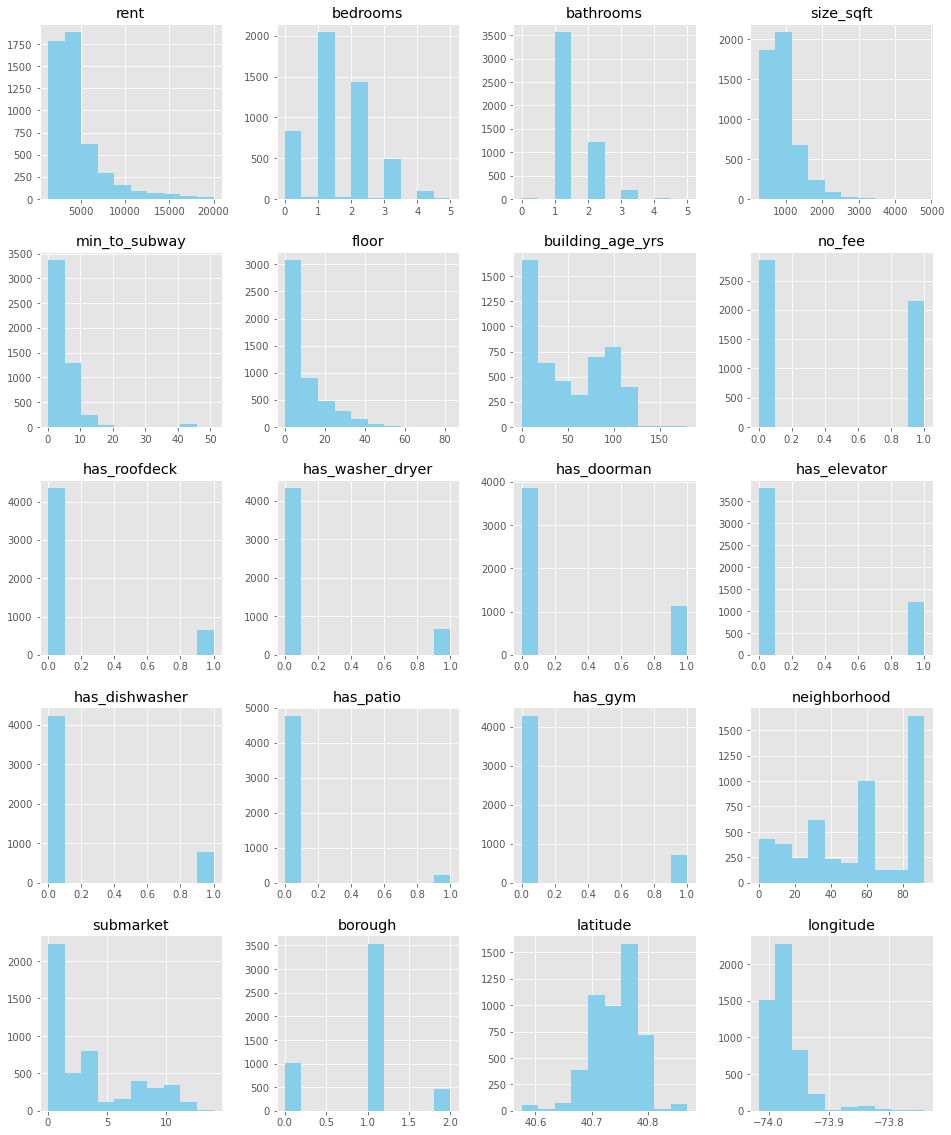

In [9]:
# distribution and outlier check
d = df.hist(figsize = (16,20),color='skyblue')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

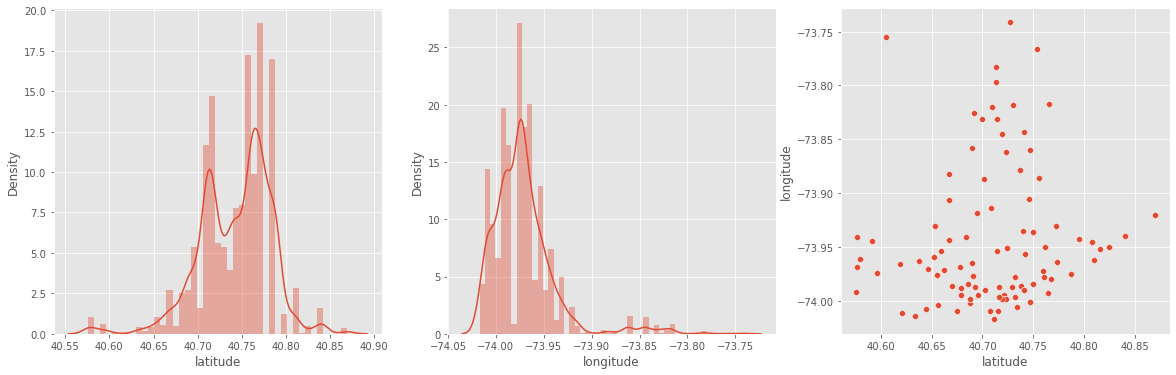

In [59]:
# distribution for location variables
fig, axes = plt.subplots(1,3, figsize=(20,6))
sns.distplot(df['latitude'], ax=axes[0])
sns.distplot(df['longitude'], ax=axes[1])
sns.scatterplot(x= df['latitude'], y=df['longitude'])

<AxesSubplot:xlabel='floor', ylabel='Density'>

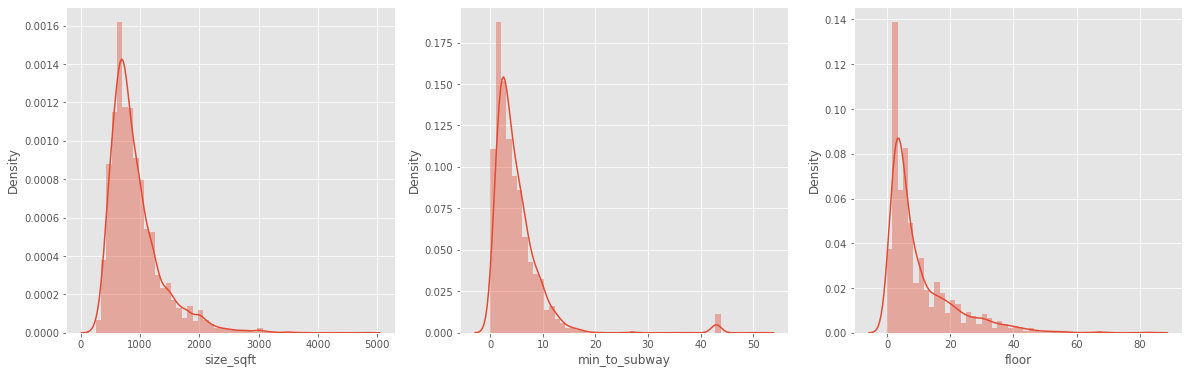

In [60]:
# distribution and skewness
# feature: size, transportation, floor
fig, axes = plt.subplots(1,3,figsize=(20, 6))
sns.distplot(df['size_sqft'], ax=axes[0])
sns.distplot(df['min_to_subway'], ax=axes[1])
sns.distplot(df['floor'], ax=axes[2])

Text(0.5, 0, 'log_min_to_subway')

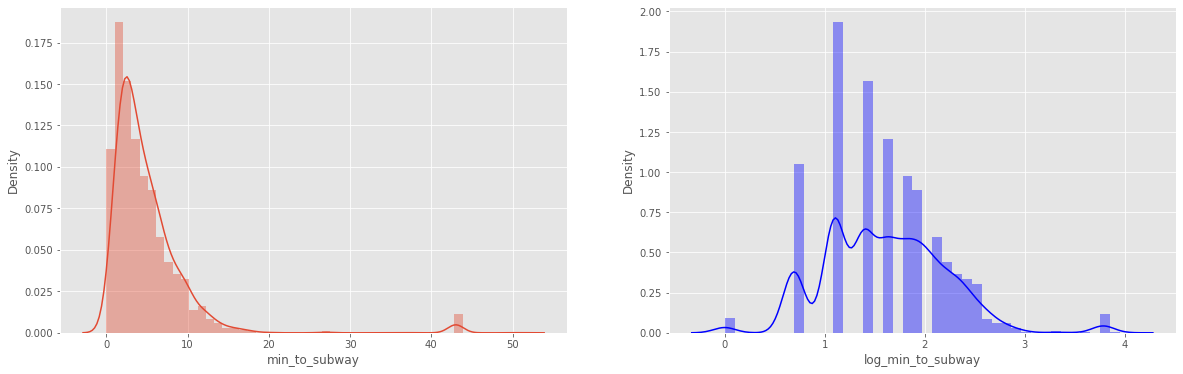

In [61]:
# log transformation for 'min_to_subway'
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df['min_to_subway'], ax = axes[0])
sns.distplot(np.log1p(df['min_to_subway']), color="blue", ax = axes[1])
axes[1].set_xlabel('log_min_to_subway')

In [63]:
# replace old feature
df['min_to_subway'] = np.log1p(df['min_to_subway'])

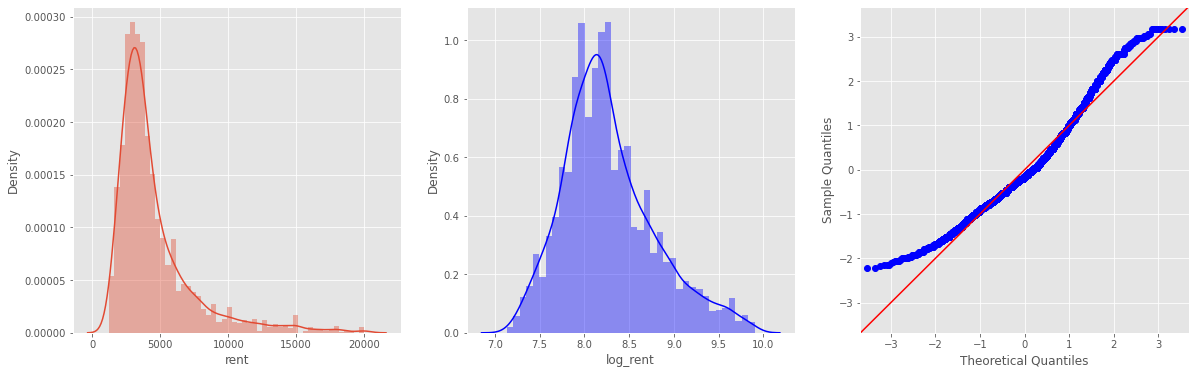

In [62]:
# distribution for 'rent'
# log transformation for 'rent'
fig, axes = plt.subplots(1,3, figsize=(20,6))
sns.distplot(df['rent'], ax=axes[0])
sns.distplot(np.log1p(df['rent']),  color="blue",ax=axes[1])
axes[1].set_xlabel('log_rent')
sm.qqplot(np.log1p(df['rent']), stats.norm, fit=True, line='45', ax=axes[2]);

In [64]:
# replace old feature
df['rent'] = np.log1p(df['rent'])

## Feature Importance

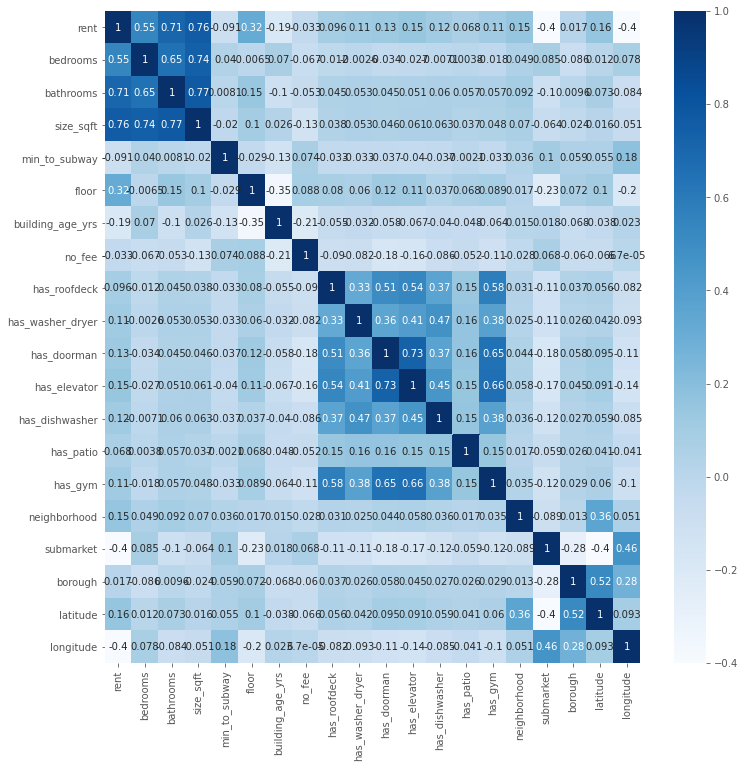

In [19]:
# correlation check
plt.figure(figsize=(12,12))  
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues') 

In [65]:
dfx, dfy = df.iloc[:,1:], df.iloc[:,0]

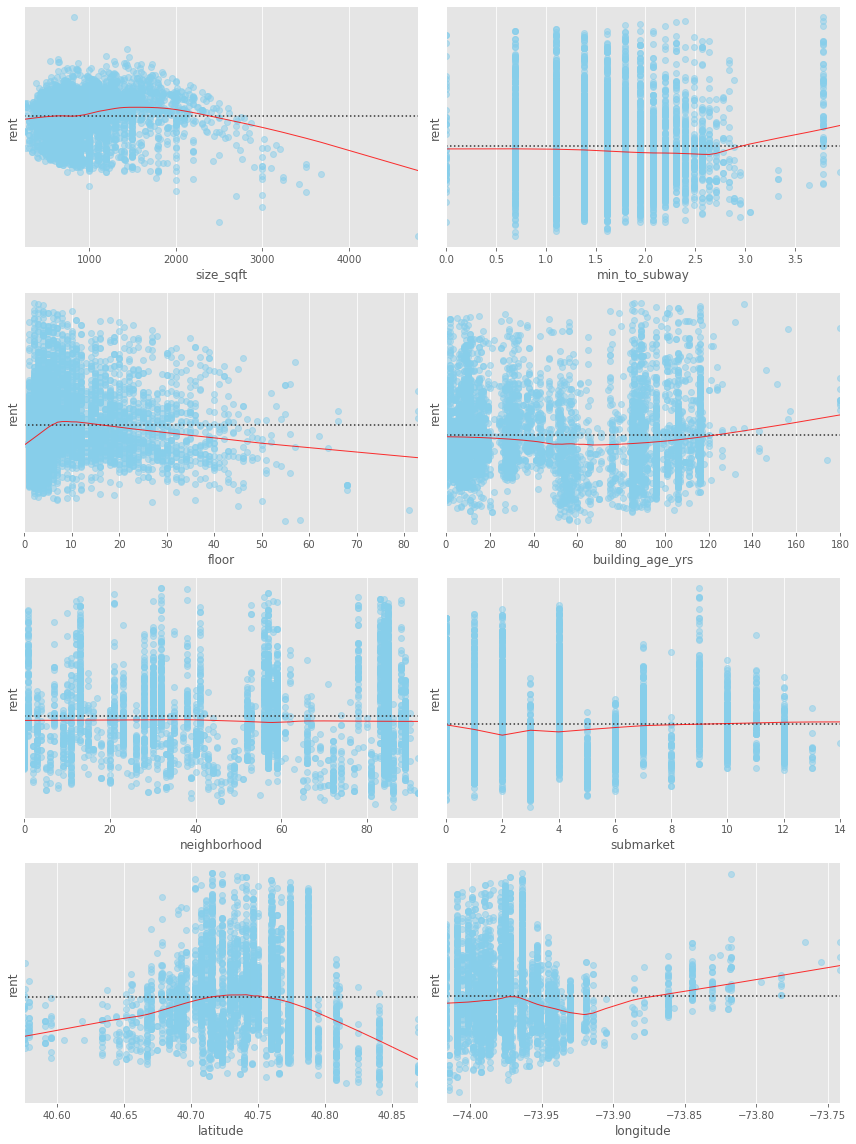

In [66]:
# residual plots for non-dummy variables
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
sns.residplot(dfx.iloc[:,2],dfy, lowess=True, ax=axes[0, 0], color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(dfx.iloc[:,3],dfy, lowess=True, ax=axes[0,1], color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(dfx.iloc[:,4],dfy, lowess=True, ax=axes[1, 0], color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(dfx.iloc[:,5],dfy, lowess=True, ax=axes[1, 1],color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(dfx.iloc[:,14],dfy, lowess=True, ax=axes[2,0], color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(dfx.iloc[:,15],dfy, lowess=True, ax=axes[2,1], color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}),
sns.residplot(dfx.iloc[:,17],dfy, lowess=True, ax=axes[3,0], color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}),
sns.residplot(dfx.iloc[:,18],dfy, lowess=True, ax=axes[3,1], color='skyblue',
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()

In [67]:
# dataset normalization
# feature: mean=0, std=1
scaler = StandardScaler()
dfx = scaler.fit_transform(dfx)

In [68]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3,random_state=42)

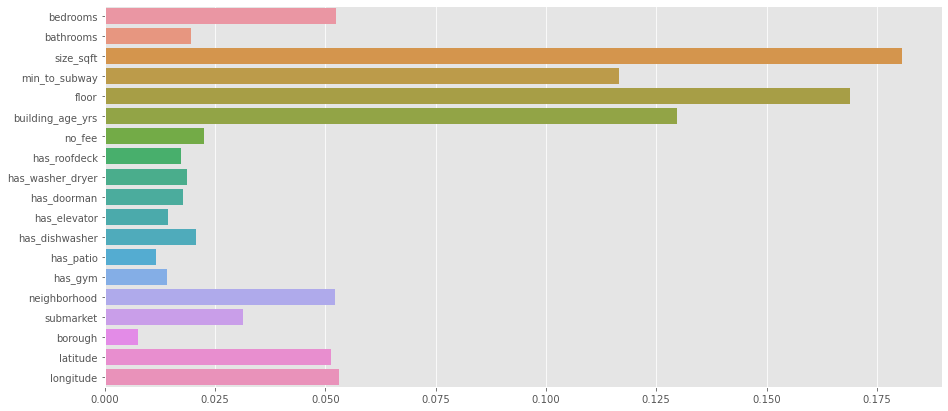

In [69]:
# feature importance plot
encode = preprocessing.LabelEncoder()
importance = ExtraTreesClassifier(n_estimators=50)
importance.fit(X_train,encode.fit_transform(y_train))
plt.figure(figsize=(15,7))
importanceplot = pd.Series(importance.feature_importances_, index=df.iloc[:,1:].columns)
sns.barplot(importanceplot,importanceplot.index)
plt.show()

# ---------------------- Prediction ---------------------

## Cross Validation and Transformation

In [27]:
# define cross validation and polynomial transformation
def cvpoly(input_x, input_y):
    
    # 5-fold cross validation
    kfold_cv=KFold(n_splits=5, shuffle=False)
    for train_index, test_index in kfold_cv.split(input_x,input_y):
        X_train, X_test = input_x[train_index], input_x[test_index]
        y_train, y_test = input_y[train_index], input_y[test_index]
        
    # polynomial transformation
    # solve non-linear relationship
    polytrans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_train = polytrans.fit_transform(X_train)
    X_test = polytrans.fit_transform(X_test)

## Linear Regression

In [28]:
# define model
def lr(input_x, input_y, cv=5):
    
    Linearmodel= LinearRegression()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    # grid search
    gridsearch = GridSearchCV(estimator=Linearmodel,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    gridsearch.fit(input_x, input_y)
    bestparameters = gridsearch.best_params_  
    print('best parameters:')
    print(bestparameters)

lr(dfx, dfy)

best parameters:
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [29]:
# cross validation and polynomial transformation
cvpoly(dfx, dfy)

In [30]:
# model fit and prediction
linear = LinearRegression(copy_X= True, fit_intercept = True, normalize = False)
linear.fit(X_train, y_train)
linear_pred= linear.predict(X_test)
print('MAE: %f'% mean_absolute_error(y_test, linear_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, linear_pred)))   
print('R2 %f' % r2_score(y_test, linear_pred))

MAE: 0.162739
RMSE: 0.214544
R2 0.830896


## Lasso Regression

In [31]:
# define model
def lassor(input_x, input_y, cv=5):

    Lassomodel= Lasso()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    # grid search
    gridsearch = GridSearchCV(estimator=Lassomodel,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    gridsearch.fit(input_x, input_y)
    bestparameters = gridsearch.best_params_  
    print('best parameters:')
    print(bestparameters)
    
lassor(dfx, dfy)

best parameters:
{'alpha': 0.001, 'normalize': False}


In [32]:
# cross validation and polynomial transformation
cvpoly(dfx, dfy)

In [33]:
# model fit and prediction
lasso = Lasso(alpha = 0.001, normalize =False)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test) 
print('MAE: %f' % mean_absolute_error(y_test, lasso_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('R2 %f' % r2_score(y_test, lasso_pred))

MAE: 0.162693
RMSE: 0.214414
R2 0.831101


## ElasticNet Regression

In [34]:
# define model
def elasticnetr(input_x, input_y,cv=5):
 
    ElasticNetmodel= ElasticNet()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    # grid search
    gridsearch = GridSearchCV(estimator=ElasticNetmodel,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    gridsearch.fit(input_x, input_y)
    bestparameters = gridsearch.best_params_  
    print('best parameters:')
    print(bestparameters)

elasticnetr(dfx, dfy)

best parameters:
{'alpha': 0.01, 'normalize': False}


In [35]:
# cross validation and polynomial transformation
cvpoly(dfx, dfy)

In [36]:
# model fit and prediction
elasticnet = ElasticNet(alpha = 0.01, normalize=False)
elasticnet.fit(X_train, y_train) 
elasticnet_pred= elasticnet.predict(X_test)
print('MAE: %f' % mean_absolute_error(y_test,elasticnet_pred)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,elasticnet_pred)))
print('R2 %f' % r2_score(y_test, elasticnet_pred))

MAE: 0.163351
RMSE: 0.214513
R2 0.830946


# ----------- Prediction after Feature Selection ------------

In [41]:
# drop less significant features according to feature importance plot
df2= df.drop(columns=['borough',
                      'bathrooms',
                      'no_fee',
                      'has_roofdeck',
                      'has_washer_dryer',
                      'has_doorman',
                      'has_elevator',
                      'has_dishwasher',
                      'has_patio',
                      'has_gym'])
dfx2, dfy2 = df2.iloc[:,1:], df2.iloc[:,0]

In [42]:
# normalization
# split dataset
scaler = StandardScaler()
dfx2 = scaler.fit_transform(dfx2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfx2, dfy2, test_size=0.3,random_state=42)

## Linear Regression

In [43]:
# grid search, cross validation and transformation
lr(dfx2, dfy2)
cvpoly(dfx2, dfy2)

best parameters:
{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [44]:
# model fit and prediction
linear2 = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
linear2.fit(X_train2, y_train2)
lr_pred2= linear2.predict(X_test2)
print('MAE: %f'% mean_absolute_error(y_test2, lr_pred2))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test2, lr_pred2)))   
print('R2 %f' % r2_score(y_test2, lr_pred2))

MAE: 0.168862
RMSE: 0.223795
R2 0.815999


## Lasso Regression

In [45]:
# grid search, cross validation and transformation
lassor(dfx2, dfy2)
cvpoly(dfx2, dfy2)

best parameters:
{'alpha': 0.0001, 'normalize': False}


In [46]:
# model fit and prediction
lasso2 = Lasso(alpha = 0.001, normalize =False)
lasso2.fit(X_train2, y_train2)
lasso_pred2 = lasso2.predict(X_test2) 
print('MAE: %f' % mean_absolute_error(y_test2, lasso_pred2))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test2, lasso_pred2)))
print('R2 %f' % r2_score(y_test2, lasso_pred2))

MAE: 0.169087
RMSE: 0.223875
R2 0.815866


## ElasticNet Regression

In [47]:
# grid search, cross validation and transformation
elasticnetr(dfx2, dfy2)
cvpoly(dfx2, dfy2)

best parameters:
{'alpha': 0.001, 'normalize': False}


In [48]:
# model fit and prediction
elasticnet2 = ElasticNet(alpha = 0.001, normalize=False)
elasticnet2.fit(X_train2, y_train2) 
elasticnet_pred2= elasticnet2.predict(X_test2)
print('MAE: %f' % mean_absolute_error(y_test2,elasticnet_pred2)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test2,elasticnet_pred2))) 
print('R2 %f' % r2_score(y_test2, elasticnet_pred2))

MAE: 0.168983
RMSE: 0.223809
R2 0.815976


# --------------------- Conclusion --------------------

Feature selection on three models shows no improvements of accuracy, however, MAE and RMSE even increases. Within three models, accuracy and prediction metrics showing similar results, Lasso regression, on the other hand, has a better performance.  
Based on metrics MAE and RMSE, the prediction results have relatively low errors and high accuracy due to comprehensive preprocessing of dataset and location metric generation. R2 could be understood as the proportion of the variance in the dependent variable that is predictable from the independent variables, so among all models, at least 80% of data fit the model.

# ------------------- Improvement --------------------

High accuracy might lead to overfitting so cross validation is applied. To avoid underfitting due to non-linear relationship, regularized models are added into prediction process.   
The possible explanations for why feature selection has no positive impacts on prediction accuracy are as follow:
1. Dataset has limited observations and no new data is added.
2. The number of features is not large enough so simply deleting variables based on importance plot is not wise.
3. Multicollinearity may negatively impact model performance even some variables are deleted.
4. New regression models could be introduced such as Random Forest, LightGBM and XGBoost.
5. Dataset preprocessing step might have some improvement space such as the encoding method and regularized method. 

## End